In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
import sys 
sys.path.append('..')

from tools import amputation
from tools import imputation
from tools import utils
from tools.utils import colors
from tqdm import tqdm

from importlib import reload

In [3]:
from data import fetch_data

In [4]:
plt.style.use(utils.plot_style)

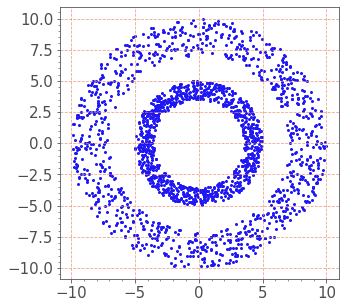

In [5]:
import matplotlib.pyplot as plt
import math
import random
fig, ax = plt.subplots(figsize=(5,5))
x = []
y = []
R = 10
for i in range(1000):
    theta = random.uniform(0,2*math.pi)
    r = random.uniform(R/2,R)
    x.append(math.sqrt(r*R)*math.cos(theta))
    y.append(math.sqrt(r*R)*math.sin(theta))

    
for i in range(1000):
    theta = random.uniform(0,2*math.pi)
    r = random.uniform(R/8,R/4)
    x.append(math.sqrt(r*R)*math.cos(theta))
    y.append(math.sqrt(r*R)*math.sin(theta))

dataset = np.vstack((x,y)).T
    
plt.scatter(x,y)
plt.show()




##  Ampyte

In [10]:
reload(amputation)

<module 'tools.amputation' from '/Users/vladislavbushmakin/Documents/GitHub/Mice/tools/amputation.py'>

In [77]:
imputer_names = ['mean', 'knn', 'mice', 'miceforest']#, 'sinkhorn', 'mean', 'linearRR', 'midas']
p_miss = 0.7
mech = "MAR"
ncols = len(imputer_names)
datasets_miss = []
imps = []
X_miss, mask = amputation.ampute(dataset, 0.5, "MAR")

In [78]:
reload(imputation)

<module 'tools.imputation' from '/Users/vladislavbushmakin/Documents/GitHub/Mice/tools/imputation.py'>

## Toy impute

In [79]:
for imputer_name in imputer_names:    
    imp = imputation.impute(X_miss, imputer_name)
    datasets_miss.append(X_miss)
    imps.append(imp)

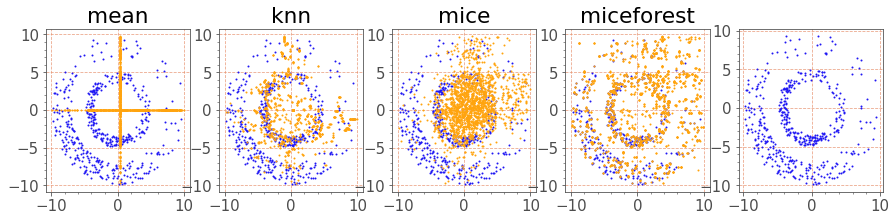

In [80]:
ncols = len(imputer_names)
fig, axs = plt.subplots(ncols=ncols + 1, nrows = 1, figsize=(3*(ncols + 1), 3))
for i in range(ncols):
    axs[i].plot(datasets_miss[i][:,0],datasets_miss[i][:,1], 'o')
    axs[i].plot(imps[i][np.where(mask)[0]][:,0],imps[i][np.where(mask)[0]][:,1], 'o')
    axs[i].set_title(f"{imputer_names[i]}", fontsize="x-large")

axs[-1].plot(datasets_miss[0][:,0],datasets_miss[0][:,1], 'o')
plt.savefig(f"figures/{mech}_{np.array(p_miss)*100} %, impute: {imputer_names}.png", dpi=200)

# Diabetes data

-- age age in years


-- sex


bmi body mass index


bp average blood pressure


s1 tc, total serum cholesterol


s2 ldl, low-density lipoproteins


s3 hdl, high-density lipoproteins


s4 tch, total cholesterol / HDL


s5 ltg, possibly log of serum triglycerides level


s6 glu, blood sugar level

In [81]:
X_full, y_full = load_diabetes(return_X_y=True,as_frame=True, scaled=False)

In [451]:
X_full.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0


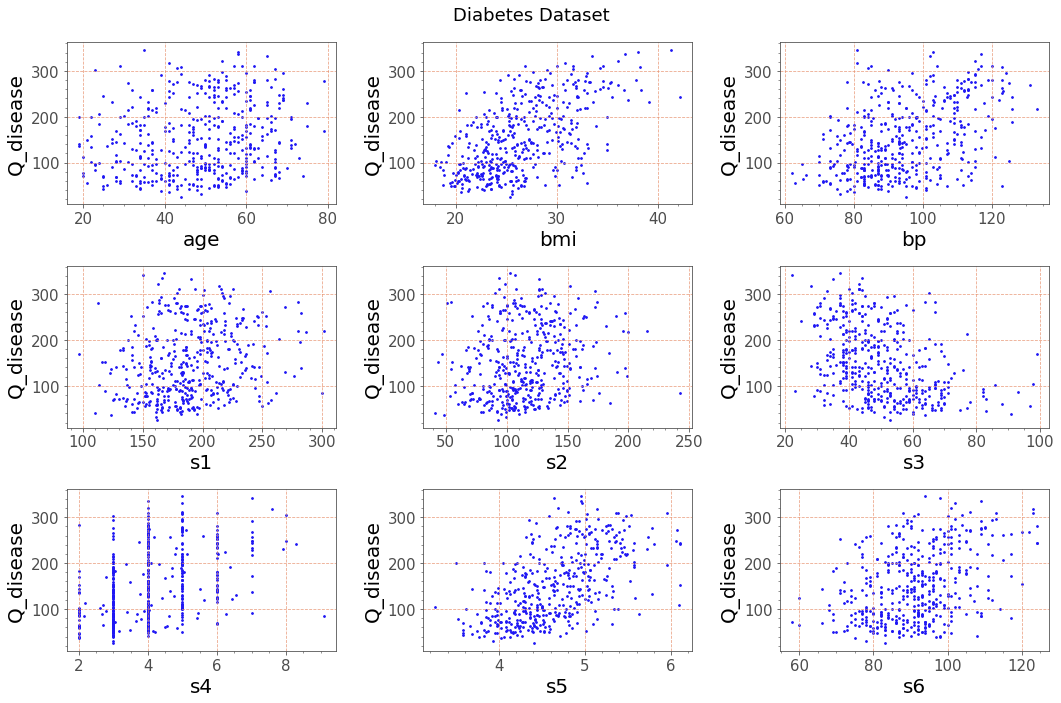

In [479]:
# Don't plot the sex data
features = list(X_full.columns)
features.remove('sex')

# Plot
fig, axs = plt.subplots(3, 3, figsize=(15, 10))
# fig.figure(figsize=(25, 20))
fig.suptitle('Diabetes Dataset')
for i in range(3):
    for j in range(3):
        n = j + i * 3
        feature = features[n]
        axs[i, j].scatter(X_full[feature], y_full, s=3, marker='o')
        axs[i, j].set_xlabel(feature)
        axs[i, j].set_ylabel('Q_disease')
plt.tight_layout()
plt.savefig(f"figures/q_disease_full.png", dpi=200)

#### Correlation map

In [481]:
corr = X_full.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).format(precision=2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.00,0.17,0.19,0.34,0.26,0.22,-0.08,0.20,0.27,0.30
sex,0.17,1.00,0.09,0.24,0.04,0.14,-0.38,0.33,0.15,0.21
bmi,0.19,0.09,1.00,0.40,0.25,0.26,-0.37,0.41,0.45,0.39
bp,0.34,0.24,0.40,1.00,0.24,0.19,-0.18,0.26,0.39,0.39
s1,0.26,0.04,0.25,0.24,1.00,0.90,0.05,0.54,0.52,0.33
s2,0.22,0.14,0.26,0.19,0.90,1.00,-0.20,0.66,0.32,0.29
s3,-0.08,-0.38,-0.37,-0.18,0.05,-0.20,1.00,-0.74,-0.40,-0.27
s4,0.20,0.33,0.41,0.26,0.54,0.66,-0.74,1.00,0.62,0.42
s5,0.27,0.15,0.45,0.39,0.52,0.32,-0.40,0.62,1.00,0.46
s6,0.30,0.21,0.39,0.39,0.33,0.29,-0.27,0.42,0.46,1.00


#### Plot most correlated parameters

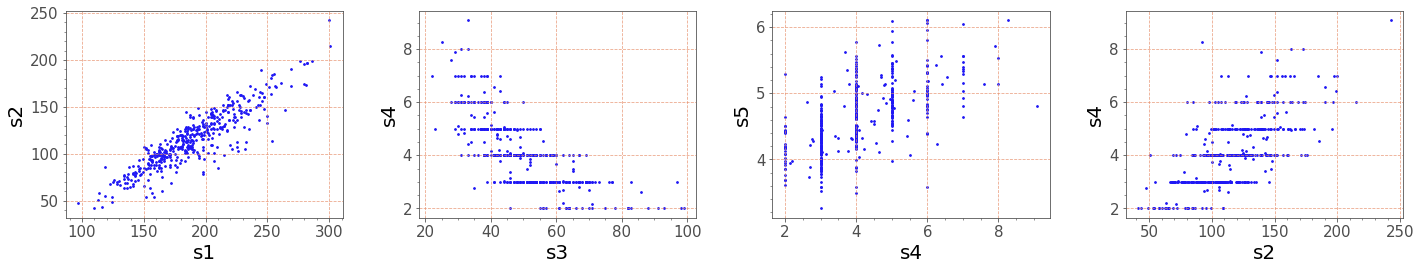

In [505]:
params = [['s1', 's2'], ['s3', 's4'], ['s4', 's5'], ['s2', 's4']]
ncols = len(params)
fig, axs = plt.subplots(ncols=ncols, nrows = 1, figsize=(5*(ncols), 4))
for i, param in enumerate(params):
    axs[i].scatter(X_full[param[0]], X_full[param[1]], s=3, marker='o')
    axs[i].set_xlabel(param[0])
    axs[i].set_ylabel(param[1])

plt.tight_layout()
plt.savefig(f"figures/most_correlated.png", dpi=200)


In [506]:
# html = corr.style.background_gradient(cmap='coolwarm', axis=None).format(precision=2).render()
# import imgkit
# imgkit.from_string(html, "figures/corr_full.pdf")

#### Sorted correlation for better visibility

In [675]:
def sorted_corr_pairs(corr_df):
    corr_pairs = []
    indxs = []
    col_names = []
    for idx, col in enumerate(X_full.columns):
        corr_line = corr_df[X_full.columns[X_full.columns != col]].loc[col]
        corr_pairs.append(corr_line)
        col_names.append([col + '-' + col_i for col_i in X_full.columns[X_full.columns != col]])

    
    corr_pairs_flat = np.array(corr_pairs).flatten()
    
    sort_idxs = np.argsort(corr_pairs_flat)
#     sort_idxs = [idx for idx in sort_idxs if idx < len(corr_pairs_flat)/2]
#     corr_pairs_flat, idx_uniq, inv = np.unique(corr_pairs_flat, return_index=True, return_inverse=True)
    
    col_names = np.array(col_names).flatten()
    return corr_pairs_flat, sort_idxs[::2], col_names

In [676]:
corr_pairs_flat, sort_idxs, col_names = sorted_corr_pairs(corr)

<Figure size 1440x720 with 0 Axes>

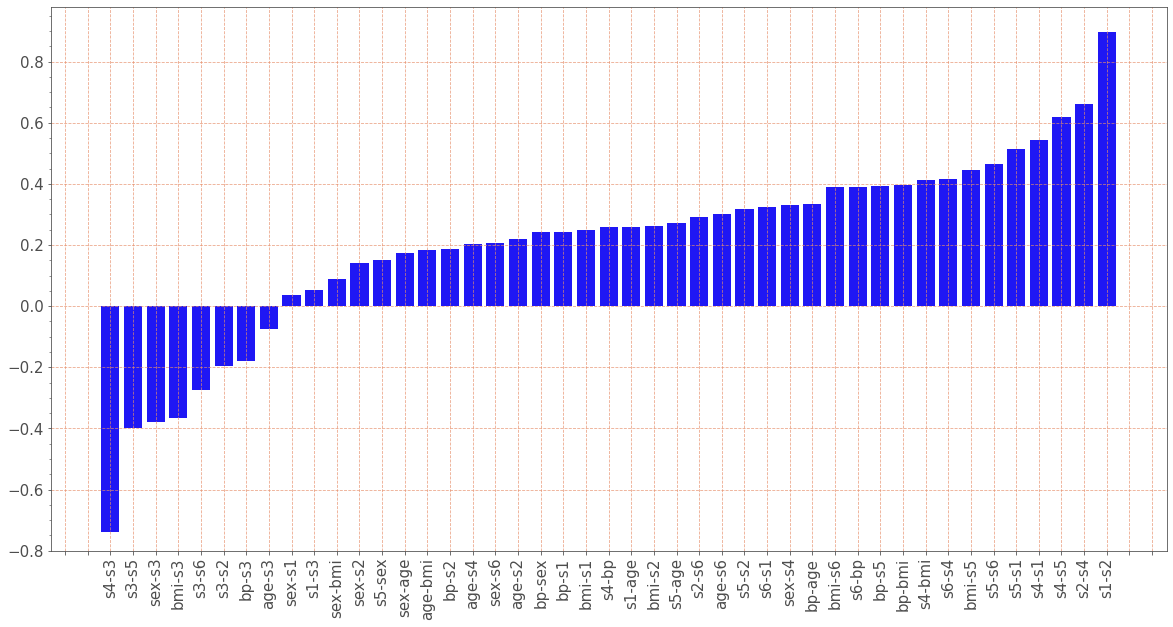

In [724]:
plt.figure(figsize=(20, 10))
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.bar(x=col_names[sort_idxs],height=corr_pairs_flat[sort_idxs])
# ax.grid(which='major')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.xticks(rotation=90);
plt.ylim(-0.8)
# plt.xticks(col_names[sort_idxs][::2]);
plt.savefig(f"figures/sorted_correlated.png", dpi=200)

## Ampute diabetes

In [646]:
reload(amputation)

<module 'tools.amputation' from '/Users/vladislavbushmakin/Documents/GitHub/Mice/tools/amputation.py'>

In [728]:
p_miss = 0.5
p_mech = 'MAR'

In [693]:
X_miss, mask = amputation.ampute(X_full, p_miss, p_mech, vars_observed=[0, 2], score_func='SIGMOID-LEFT',frame=True)#weights = [-10,1,-5,-5,0,-20,1,2,-3,10]

In [694]:
# mask = pd.DataFrame(~np.random.choice([0, 1], size=(X_full.shape), p=[3./4, 1./4]).astype(bool), columns = X_full.columns)
# X_miss = X_full
# X_miss = X_miss[~mask]

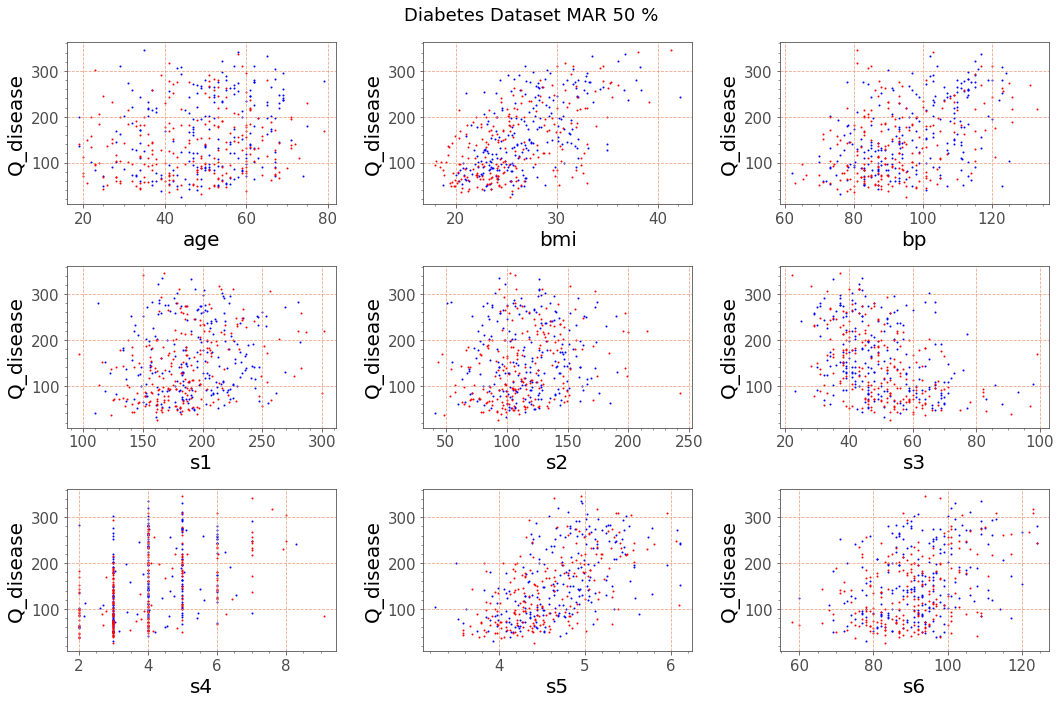

<Figure size 864x432 with 0 Axes>

In [697]:
# Don't plot the sex data
features = list(X_miss.columns)
features.remove('sex')

# Plot
fig, axs = plt.subplots(3, 3, figsize=(15, 10))
# fig.figure(figsize=(25, 20))
fig.suptitle('Diabetes Dataset MAR 50 %')
for i in range(3):
    for j in range(3):
        n = j + i * 3
        feature = features[n]
        axs[i, j].scatter(X_miss[feature], y_full, s=1, color='b')
        axs[i, j].scatter(X_full[mask][feature], y_full, s=1, color='r')
        axs[i, j].set_xlabel(feature)
#         axs[i, j].set_ylabel('s1')
        axs[i, j].set_ylabel('Q_disease')
plt.tight_layout()
plt.show()
plt.savefig(f"figures/q_disease_ampute_{p_mech}_{p_miss}.png", dpi=200)

In [698]:
corr_miss = X_miss.corr()
corr_miss.style.background_gradient(cmap='coolwarm', axis=None).format(precision=2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.00,0.21,0.05,0.24,0.22,0.20,-0.15,0.22,0.26,0.26
sex,0.21,1.00,0.09,0.24,-0.07,0.08,-0.41,0.33,0.09,0.21
bmi,0.05,0.09,1.00,0.36,0.09,0.09,-0.36,0.33,0.40,0.29
bp,0.24,0.24,0.36,1.00,0.17,0.08,-0.13,0.21,0.39,0.34
s1,0.22,-0.07,0.09,0.17,1.00,0.87,0.21,0.41,0.41,0.25
s2,0.20,0.08,0.09,0.08,0.87,1.00,-0.05,0.54,0.14,0.20
s3,-0.15,-0.41,-0.36,-0.13,0.21,-0.05,1.00,-0.74,-0.32,-0.24
s4,0.22,0.33,0.33,0.21,0.41,0.54,-0.74,1.00,0.52,0.37
s5,0.26,0.09,0.40,0.39,0.41,0.14,-0.32,0.52,1.00,0.45
s6,0.26,0.21,0.29,0.34,0.25,0.20,-0.24,0.37,0.45,1.00


In [699]:
corr_pairs_flat_miss, sort_idxs_miss, names = sorted_corr_pairs(corr_miss)

<Figure size 1440x720 with 0 Axes>

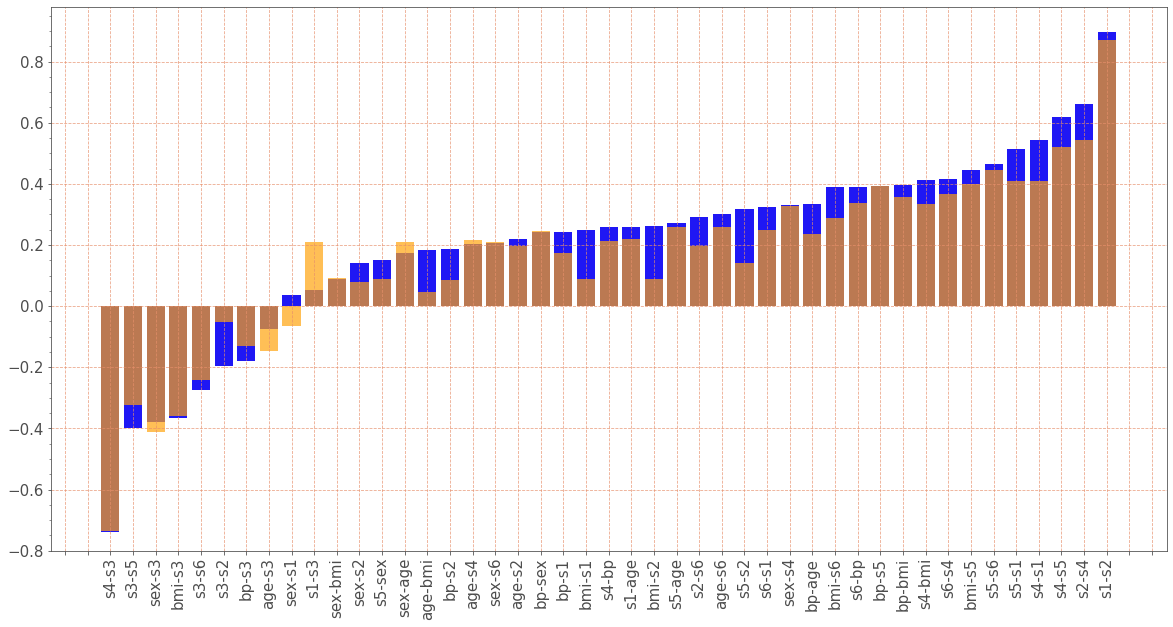

In [723]:
plt.figure(figsize=(20, 10))
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.bar(x=col_names[sort_idxs],height=corr_pairs_flat[sort_idxs])
ax.bar(x=col_names[sort_idxs],height=corr_pairs_flat_miss[sort_idxs], alpha=0.7)
# ax.grid(which='major')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.xticks(rotation=90);
plt.ylim(-0.8)
# plt.xticks(col_names[sort_idxs][::2]);
plt.savefig(f"figures/sorted_correlated_amputed_{p_mech}_{p_miss}.png", dpi=200)

## Impute diabetes

In [734]:
reload(imputation)

<module 'tools.imputation' from '/Users/vladislavbushmakin/Documents/GitHub/Mice/tools/imputation.py'>

In [753]:
imp_method = 'miceforest'
imp = imputation.impute(X_miss, imp_method,frame=True)

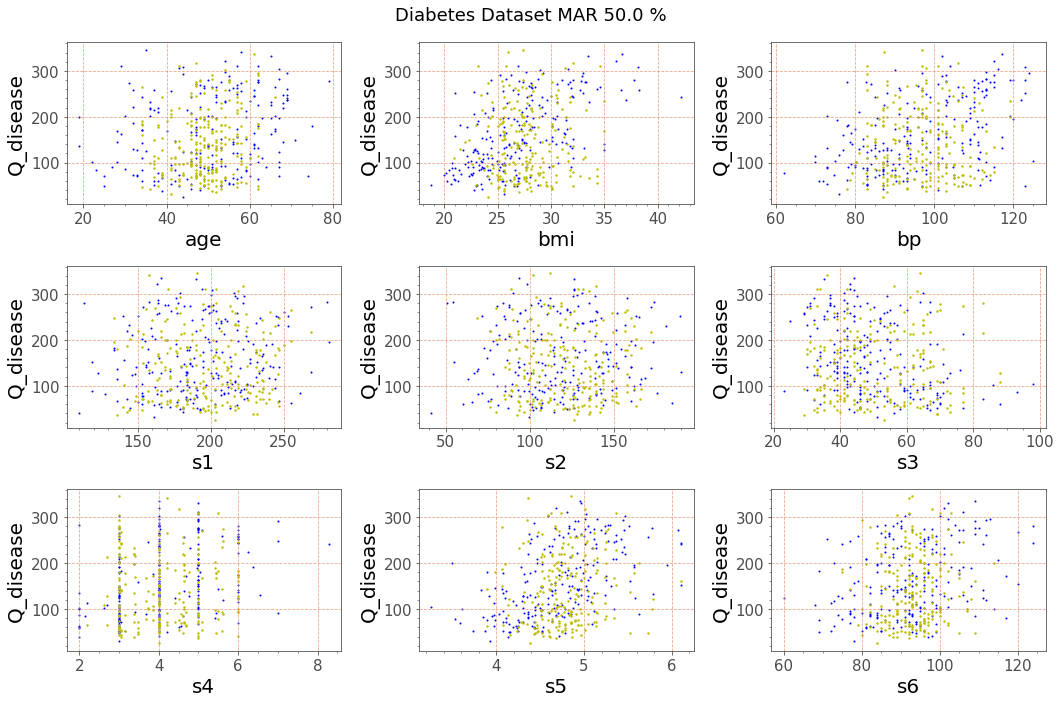

In [754]:
# Don't plot the sex data
features = list(imp.columns)
features.remove('sex')

# Plot
fig, axs = plt.subplots(3, 3, figsize=(15, 10))
# fig.figure(figsize=(25, 20))
fig.suptitle(f'Diabetes Dataset {p_mech} {100 * p_miss} %')
for i in range(3):
    for j in range(3):
        n = j + i * 3
        feature = features[n]
        axs[i, j].scatter(X_miss[feature], y_full, s=1, color='b')
        axs[i, j].scatter(imp[mask][feature], y_full, s=2, color='y')
        axs[i, j].set_xlabel(feature)
        axs[i, j].set_ylabel('Q_disease')
plt.tight_layout()
plt.savefig(f"figures/q_disease_impute_{imp_method}_{p_mech}_{p_miss}.png", dpi=200)
plt.show()

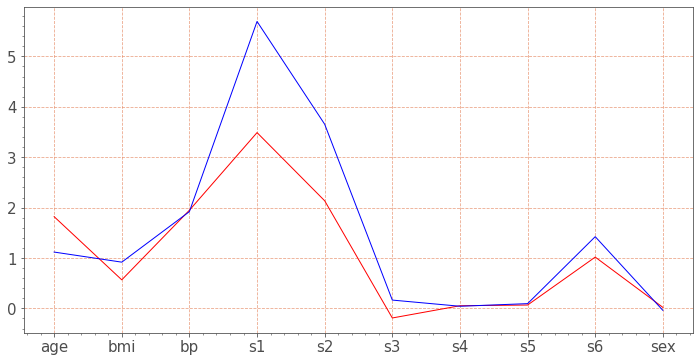

In [755]:

idx_i = np.argsort(X_miss.mean())
plt.plot(X_miss.mean()[idx_i] - X_full.mean(), 'r-')
# plt.plot(X_full.mean(), 'k-')
plt.plot(imp.mean()[idx_i] - X_full.mean(), 'b-')

In [756]:
corr_pairs_flat_imp, sort_idxs_imp, names = sorted_corr_pairs(imp.corr())

<Figure size 1440x720 with 0 Axes>

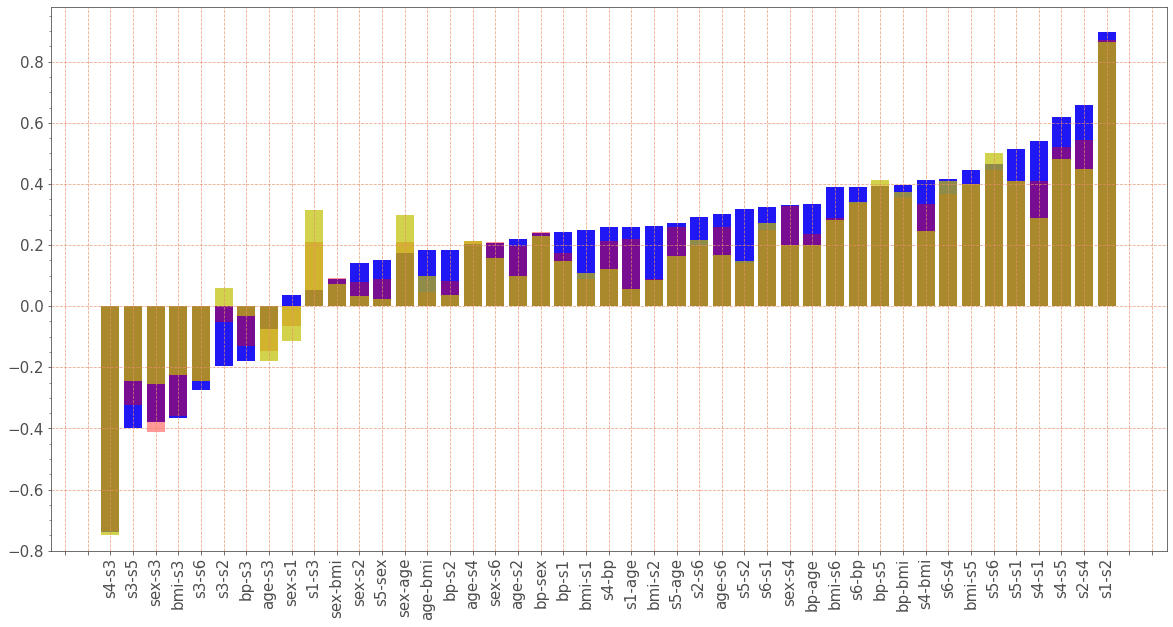

In [757]:
plt.figure(figsize=(20, 10))
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
# ax.bar(x=col_names[sort_idxs],height=corr_pairs_flat[sort_idxs])/
ax.bar(x=col_names[sort_idxs],height=corr_pairs_flat[sort_idxs])
ax.bar(x=col_names[sort_idxs],height=corr_pairs_flat_miss[sort_idxs], alpha=0.4, color='r')
ax.bar(x=col_names[sort_idxs],height=corr_pairs_flat_imp[sort_idxs], alpha=0.7,  color='y')
# ax.grid(which='major')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.xticks(rotation=90);
plt.ylim(-0.8)
# plt.xticks(col_names[sort_idxs][::2]);
plt.savefig(f"figures/sorted_correlated_imputed_{p_mech}_{p_miss}_{imp_method}.png", dpi=200)

In [774]:
from numpy import mean, absolute

def mae_calc(imp, full, mask):
    return (np.abs(np.array(imp)[mask] - np.array(full)[mask]).sum()) / np.array(mask).sum()  

In [777]:
mae_calc(imp, X_full, mask).sum()

12.648647389922832

In [778]:
np.abs(corr_pairs_flat_miss[sort_idxs] - corr_pairs_flat[sort_idxs]).sum()

2.972236660973283

In [779]:
np.abs(corr_pairs_flat_imp[sort_idxs] - corr_pairs_flat[sort_idxs]).sum()

4.937097715956138

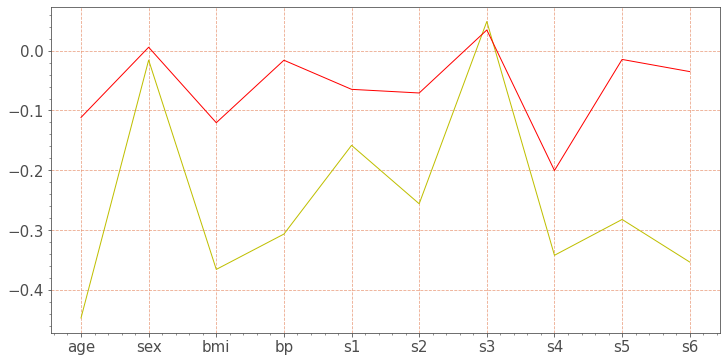

In [780]:
plt.plot((imp.var()-X_full.var())/X_full.var(), 'y-')
plt.plot((X_miss.var()-X_full.var())/X_full.var(), 'r-')
# plt.plot(X_full.var())

## Analyse imputation

In [916]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score, mean_squared_error, r2_score

In [917]:
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.33, random_state=42)

In [918]:
from sklearn import linear_model
clf = linear_model.BayesianRidge()#BayesianRidge()
clf.fit(X_train, y_train)
predict_full = clf.predict(X_test)
clf.score(X_test, y_test)

0.46595877763830407

In [919]:
from sklearn import linear_model
X_train, X_test, y_train, y_test = train_test_split(X_miss.dropna(), y_full[X_miss.dropna().index], test_size=0.33, random_state=42)
clf = linear_model.BayesianRidge()
clf.fit(X_train, y_train)
predict_full = clf.predict(X_test)
clf.score(X_test, y_test)

0.5167030565924713

In [920]:
reload(imputation)

<module 'tools.imputation' from '/Users/vladislavbushmakin/Documents/GitHub/Mice/tools/imputation.py'>

In [921]:
imp_method = 'ice'
imp = imputation.impute(X_miss, imp_method,frame=True)

In [922]:
from sklearn import linear_model
X_train, X_test, y_train, y_test = train_test_split(imp, y_full, test_size=0.33, random_state=42)
clf = linear_model.BayesianRidge()#BayesianRidge()
clf.fit(X_train, y_train)
predict_full = clf.predict(X_test)
clf.score(X_test, y_test)

0.04442378639874223

<AxesSubplot:>

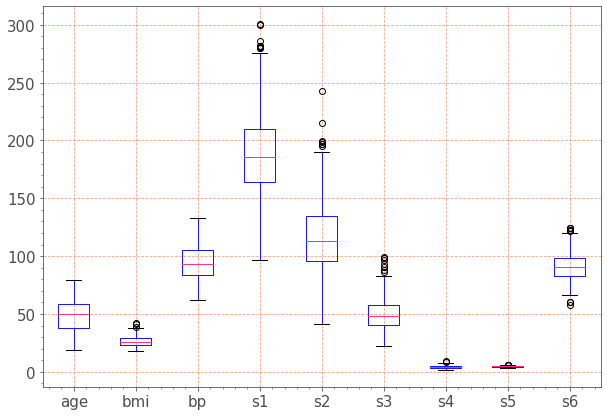

In [870]:
X_full.drop("sex",axis=1).boxplot(figsize = [10, 7])
# plt.show()


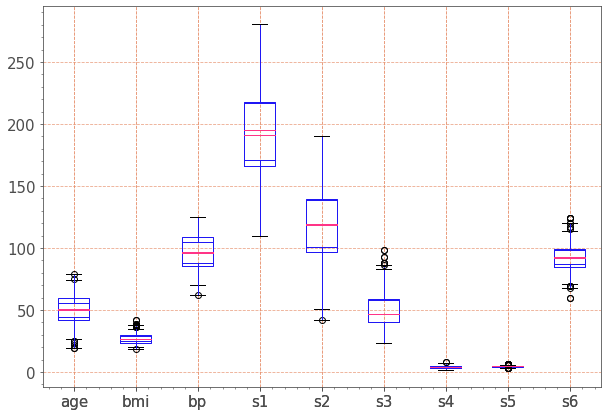

In [871]:
imp.drop("sex",axis=1).boxplot(figsize = [10, 7])
X_miss.drop("sex",axis=1).boxplot(figsize = [10, 7])
plt.show()

In [847]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(X_full.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [848]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.014 seconds


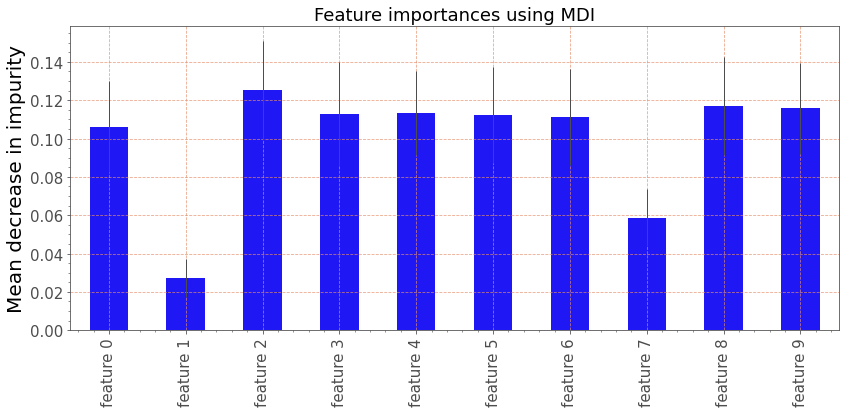

In [849]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [850]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 5.182 seconds


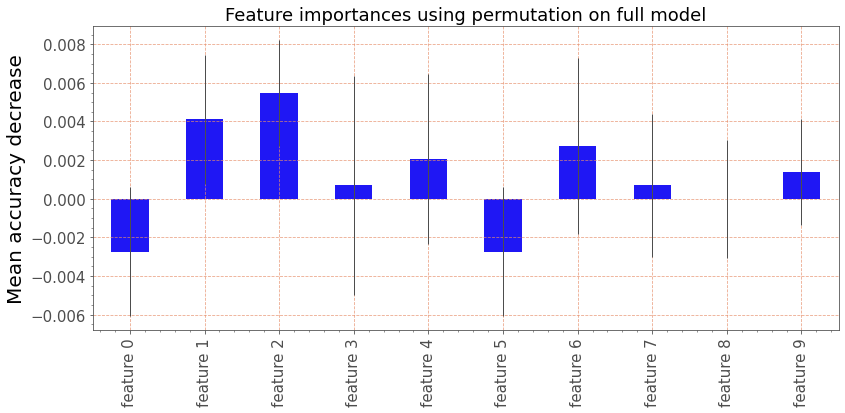

In [851]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()